# Canal Bottom Elevation & Widening measurements

During the field campaigns, the canal bottom elevation was measured at the 5 differents gates (see Fig. 1 and Fig. 3). Here we show the results.

In [5]:
using NBInclude
using PyPlot
using Statistics
using Interpolations
using DelimitedFiles: readdlm 
using LaTeXStrings
@nbinclude("helper-functions.ipynb");

# Canal Bottom Elevation



## Methods 

### For P1 and P2

The elevation is taken from a single stake geo-referenced as shown bellow:

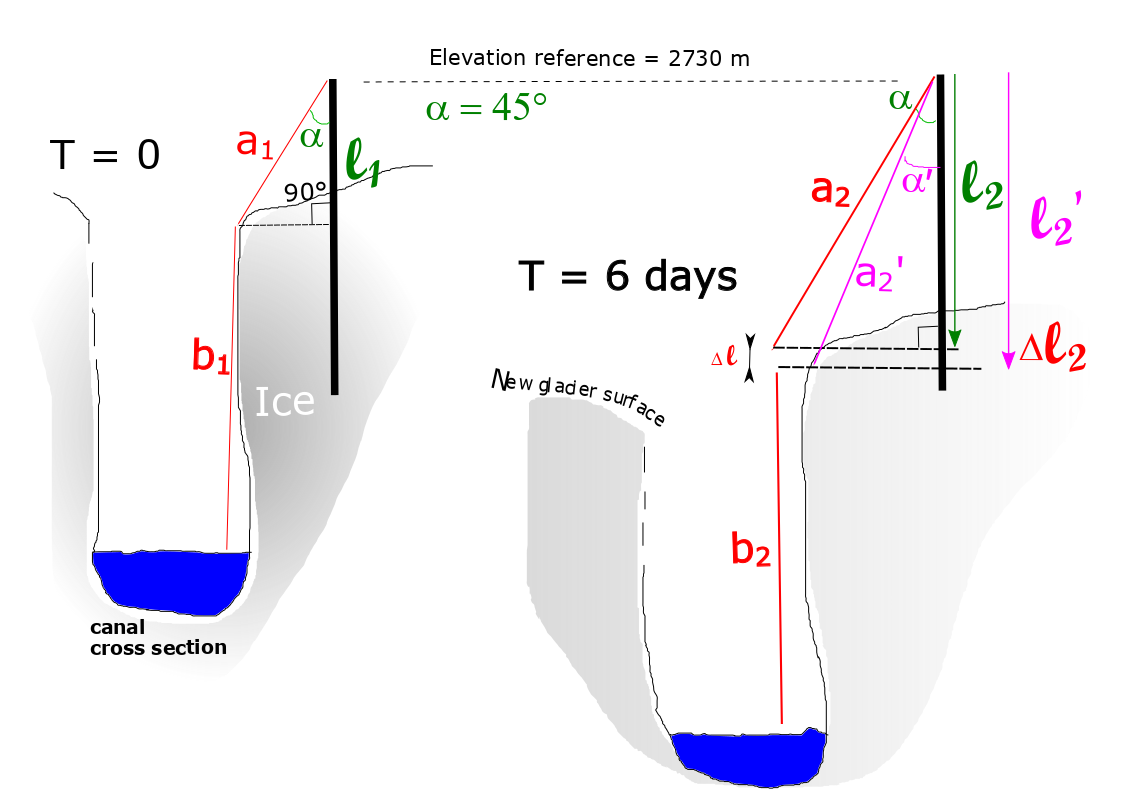

**On the left the situation at the beginning of drainage.** The triangle formed by **l** and **a** is assumed rectangle. The elevation is computed as follow:

**$Z_{canal} = Z_{ref} - l_1 - b_1$**

with $l_1 = cos(α)*a_1$

For the sake of simplicity we assume that **α is constant (=45°)** during all the measurements. Of course this is not true when surface glacier melt (around 10cm a day, even more sometimes), because the geometry changes. On the right we can see the situation after 6 days. Assuming a constant α instead of recalculing it (α') lead to an error of Δl in the elevation calcul. 

So the errors can be substantial, according to the melt rate. **We do not take this error into our calculs**. However, we limited this error by re-drilling severals times the stakes deeper. Indeed stakes were only 2 meters long, and it allow to come back to an "original configuration" quite often.

### For P3,P4 and P5

For these gates the elevation is much more accurate because the elevation reference is independant of the sides geometry. The gate (a cross beam supported by two drilled stakes at each canal sides) is fix, and moved only when stakes are drilled deeper to anticipate melt. With this system the reproductibility is good, and the measures more accurate.

### Raw elevation datas for each stations are stored in `data/Channel_elevation`:

In the following `x` is the time when measurment were realized, `y` is elevation. Example: `y1` is elevation at P1. 

Uncertaities on `y` is the standard deviation (e.g. std_P1). At the beginning the errors are small. Then, because the canal is getting deeper and harder to monitor, errors from the measuring tape readings are estimated bigger. Note that the GPS (RTK) accuracy is about only few mm.

### Bonus: Pressure data to estimate lowering rate... 

During the drainage the canal was lowering by melting at a substancial rate (around 40cm a day at the highest). And sometimes the rope where sensors were attached was too short for the sensors to lie on bottom... So the sensors were staying around at a constant elevation. In consequence the datas don't reflect the water height but the water top elevation from a fix position. 

Of course this create some data gaps in water height time series. But that also means that the lowering rate can be directly measured form this configuration, assuming that the water stage is constant, until the sensors was finally out in the air. So here we also selected pressure time series windows when this happended. We associate an arbitary elevation to match our field elevation measurements, just in order to assess the trend in lowering rate, i.e investigate the slope from water stage time series compare to the slope from fields measurements.

# @ P1

### Elevations from field measurements

In [6]:
d,head = readdlm(path_data*"Channel_elevation/P1_channel_elevation.csv" , ';', header=true)
x1 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]
y1 = d[:,2];
std_P1 = d[:,3];

#x1=[DateTime(2019,7,10,15,39),DateTime(2019,7,11,8,10),DateTime(2019,7,16,11,57),
   # DateTime(2019,7,30,12,2),DateTime(2019,8,14,9),DateTime(2019,8,23,11,48)]
#y1=[2729.34,2729.114,2728.598,2721.952,2720.771,2720.940];


In [3]:
#total channel incision at P1
y1[1]-y1[end]

LoadError: [91mUndefVarError: y1 not defined[39m

### From water stage time series

**Water stage datas are directlly imported from raw datas with `read_Keller_DCX22_CTD`**

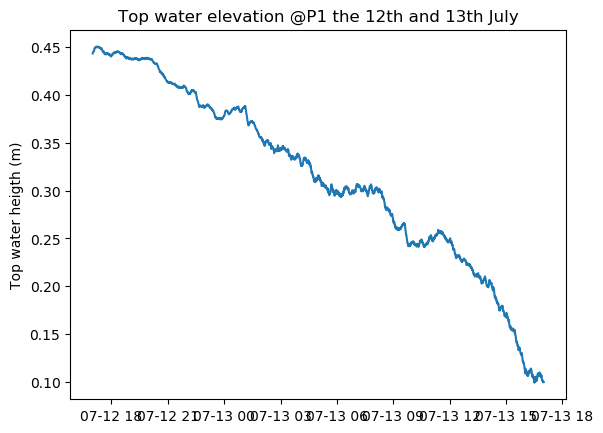

PyObject Text(24.00000000000002, 0.5, 'Top water heigth (m)')

In [5]:
#Incision rate from pressure data from 12/07 to 13/07 at 14:
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-15/205144-10mH2O_11_07_2019-13_45_00.csv");
hw = d[:press][findfirst(x->x==DateTime(2019,7,12,17), d[:t]):findfirst(x->x==DateTime(2019,7,13,17), d[:t])]
t=d[:t][findfirst(x->x==DateTime(2019,7,12,17), d[:t]):findfirst(x->x==DateTime(2019,7,13,17), d[:t])];
h_smooth = boxcar(hw,10);
plot(t,h_smooth)
title("Top water elevation @P1 the 12th and 13th July")
ylabel("Top water heigth (m)")

### Plot @ P1

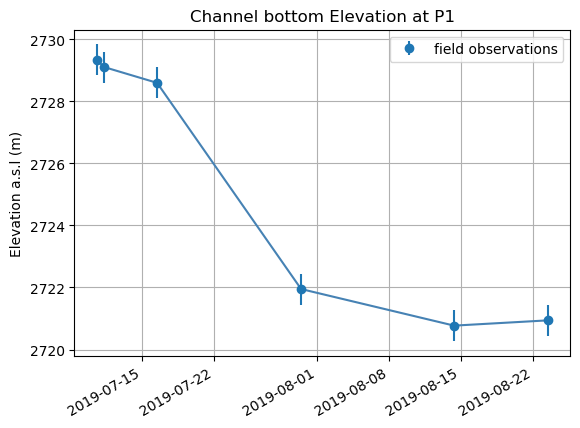

PyObject Text(0.5, 1, 'Channel bottom Elevation at P1')

In [47]:
fig=figure()
p = plot(x1,y1,linestyle="-",color="steelblue")
pe = errorbar(x1,y1,yerr=std_P1,fmt="o",label="field observations")
#pp=plot(t,h_smooth .+2728.57, label="top water elevation")  #the altitude is arbitrary chose to match the blue curve
fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
grid(true)
legend()
ylabel("Elevation a.s.l (m)")
title("Channel bottom Elevation at P1")


### Linear interpolation of elevation time serie @P1

using function date2decimal in [`helper-functions`](helper-functions.ipynb) to convert DateTime to a float array. And then interpolare the elevation time serie. 

In [7]:
#creation of x1 datetime into decimal
x1_dec = [round(datetime2decimal(x), digits = 3) for x in x1]
#interpolation within the range
y1_interp = LinearInterpolation(x1_dec, y1);

**P1 became a zone of waterfalls and step-pools during the drainage, so that the elevation measurements are not very suitable to accurately measure the incision rate** 

# @ P2 

### Elevation from fields measurements

In [50]:
d,head = readdlm(path_data*"Channel_elevation/P2_channel_elevation.csv" , ';', header=true)
x2 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]
y2 = d[:,2];
std_P2 = d[:,3];


#x2=[DateTime(2019,7,10,13,10),DateTime(2019,7,11,8,38),DateTime(2019,7,16,12,41),DateTime(2019,7,24,15),
   # DateTime(2019,7,25,8,6),DateTime(2019,7,30,12,43),DateTime(2019,7,31,9,15),DateTime(2019,8,8,11,42),
#DateTime(2019,8,14,9,19),DateTime(2019,8,23,12,22),DateTime(2019,9,4,9,36)]
#y2=[2731.04,2731.18,2729.45,2728.35,2727.12,2725.66,2725.73,2725.08,2723.55,2723.31,2723.26];


In [51]:
#total channel incision
y2[1]-y2[end]

7.779999999999745

### From water stage time series

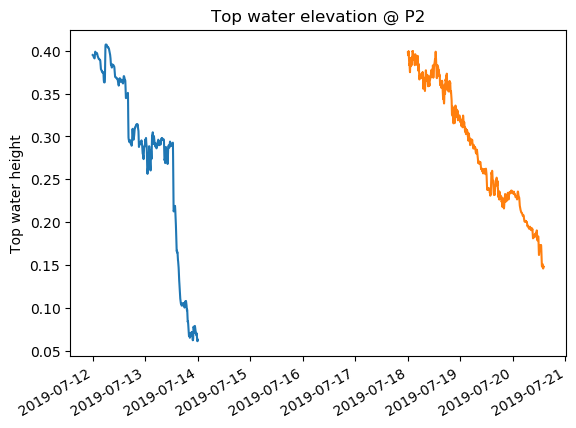

PyObject Text(24.000000000000007, 0.5, 'Top water height')

In [52]:
#Incision rate from pressure data from 12/07 to 13/07 at 14:
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-15/205145-10mH2O_11_07_2019-13_30_00.csv");
hw = boxcar(d[:press][findfirst(x->x==DateTime(2019,7,12), d[:t]):findfirst(x->x==DateTime(2019,7,14), d[:t])],10);
t=d[:t][findfirst(x->x==DateTime(2019,7,12), d[:t]):findfirst(x->x==DateTime(2019,7,14), d[:t])];
fig=figure()
plot(t,boxcar(hw,10))
#from 18/07 to 20/07 at 14:
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-24/205145-10mH2O_16_07_2019-17_00_00.csv");
h1=boxcar(d[:press][findfirst(x->x==DateTime(2019,7,18), d[:t]):findfirst(x->x==DateTime(2019,7,20,14), d[:t])],10)
t1=d[:t][findfirst(x->x==DateTime(2019,7,18), d[:t]):findfirst(x->x==DateTime(2019,7,20,14), d[:t])];
plot(t1,boxcar(h1,10))
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
title("Top water elevation @ P2")
ylabel("Top water height")

### Plot @ P2 

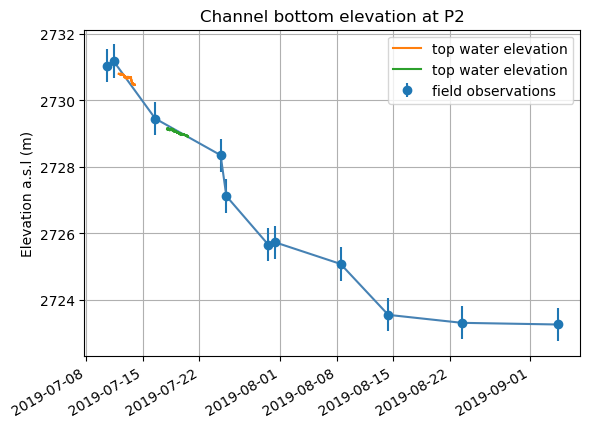

PyObject Text(0.5, 1, 'Channel bottom elevation at P2')

In [53]:
fig=figure()
p = plot(x2,y2,linestyle="-",color="steelblue")
pe = errorbar(x2,y2,yerr=std_P2,fmt="o",label="field observations")
pp=plot(t,hw.+2730.4 , label = "top water elevation")
ppp=plot(t1,h1.+2728.75, label = "top water elevation")
fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
grid(true)
legend()
ylabel("Elevation a.s.l (m)")
title("Channel bottom elevation at P2")

### Linear interpolation of elevation time serie @P2

using function date2decimal in [`helper-functions`](helper-functions.ipynb) to convert DateTime to a float array. And then interpolare the elevation time serie. 

In [12]:
#creation of x2 datetime into decimal
x2_dec = [round(datetime2decimal(x), digits = 3) for x in x2]
#interpolation within the range
y2_interp = LinearInterpolation(x2_dec,y2);

# @ P3

### Field observations

In [59]:
d,head = readdlm(path_data*"Channel_elevation/P3_channel_elevation.csv" , ';', header=true)
x3 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]
y3 = d[:,2];
std_P3 = d[:,3];


#x3=[DateTime(2019,7,9,14,35),DateTime(2019,7,10,14,5),DateTime(2019,7,11,10,10),DateTime(2019,7,16,13,17),
    #DateTime(2019,7,24,14,38),DateTime(2019,7,25,9,48),DateTime(2019,7,30,13,20),DateTime(2019,7,31,9,33),
    #DateTime(2019,8,8,12),DateTime(2019,8,14,11,50),DateTime(2019,8,23,12,46),DateTime(2019,9,4,9,43)];
#y3=[2732.59,2732.57,2732.62,2730.43,2728.38,2727.65,2726.11,2726.04,2725.38,2724.22,2723.83,2723.62];


In [60]:
#total channel incision
y3[1]-y3[end]

8.970000000000255

### From water stage time series

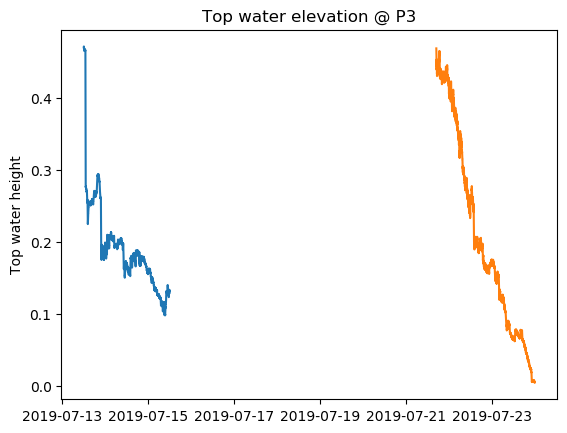

PyObject Text(24.000000000000007, 0.5, 'Top water height')

In [61]:
#Incision rate from pressure data from:
#13/07 to 15/07 at 12:
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-15/207265-300mH2O_11_07_2019-13_15_00.csv");
hw=boxcar(d[:press][findfirst(x->x==DateTime(2019,7,13,12), d[:t]):findfirst(x->x==DateTime(2019,7,15,12), d[:t])],10)
t=d[:t][findfirst(x->x==DateTime(2019,7,13,12), d[:t]):findfirst(x->x==DateTime(2019,7,15,12), d[:t])];
plot(t,hw)
#from 21/07 at 17: to 24/07 :
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-24/207265-300mH2O_16_07_2019-16_30_00.csv");
h1=boxcar(d[:press][findfirst(x->x==DateTime(2019,7,21,17), d[:t]):findfirst(x->x==DateTime(2019,7,24), d[:t])],10)
t1=d[:t][findfirst(x->x==DateTime(2019,7,21,17), d[:t]):findfirst(x->x==DateTime(2019,7,24), d[:t])];
plot(t1,h1)
title("Top water elevation @ P3")
ylabel("Top water height")

### From SR50 - Sonic Ranger

A Sonic Ranger was deployed at P3 from **11th to 21st July**. It reccords the top water elevation from the fixed cross beam (the same where depth measurements were conducted). The elevation of the sensor was at 2734.54 m.

Assuming a constant water stage, we can thus estimate the lowering rate from this top water elevation.

**To read SR50 datas from csv file**

Here we also correct the SR50 datas because of the odd behaviour.

In [71]:
#Cells strating with ";" are ignored in NBInclude. This is because there is bug with "min_ref" in Stream_Velocity Notebook
;

using Dates
using DelimitedFiles: readdlm 
d = readdlm(path_data*"SR50/SR21JULY.dat", ',', header=false)
z0=2734.54 #elevation sr50    
sr = Dict{Symbol,Any}() 
    sr[:w1] = z0.-d[:,8];
    sr[:w2] = z0.-d[:,9];
    sr[:year]=d[:,2];
    sr[:day]=d[:,3];
    sr[:t]=collect(DateTime(2019,7,11,10,13):Second(30):DateTime(2019,7,21,20,8));


purge=[]
for i in 11:length(sr[:t])-10
    m = mean(sr[:w1][i-10:i+10])
    if sr[:w1][i] < m-0.1
        append!(purge,i)
    elseif sr[:w1][i] > m+0.1
        append!(purge,i)
    end 
end
deleteat!(sr[:w1],purge)
deleteat!(sr[:w2],purge)
deleteat!(sr[:t],purge);

purge=[]
min_ref = sr[:w1][1]
for i in 1:length(sr[:t])
    if sr[:w1][i] < min_ref
        min_ref = sr[:w1][i]    ##SAY THAT min_ref is not defined when @nbinclude Canal_geometry... WHY ?????
    else
        append!(purge,i)
    end
end
deleteat!(sr[:w1],purge)
deleteat!(sr[:w2],purge)
deleteat!(sr[:t],purge);


### Plot @P3

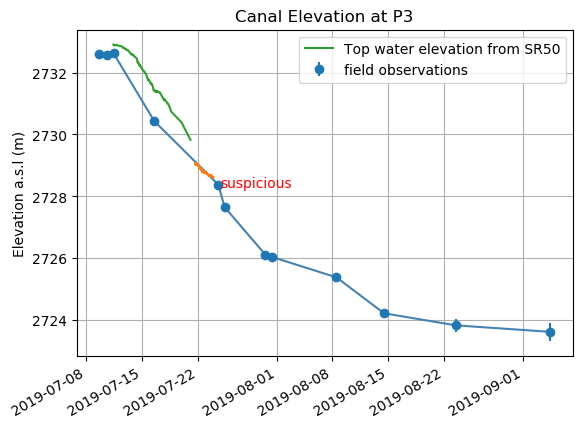

PyObject <matplotlib.legend.Legend object at 0x00000000020B0F98>

In [72]:
;
pygui(false)
fig=figure()
p = plot(x3,y3,linestyle="-",color="steelblue")
pe = errorbar(x3,y3,yerr=std_P3,fmt="o",label="field observations")
ppp=plot(t1,h1.+2728.6)  #Again: elevation here are chosen arbritary
plot(sr[:t],sr[:w2],label="Top water elevation from SR50")
fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
grid(true)
ylabel("Elevation a.s.l (m)")
title("Canal Elevation at P3")

text(DateTime(2019,7,24,22),2728.3,"suspicious",color = "r")
legend()




### Linear interpolation of elevation time serie @P3

using function date2decimal in [`helper-functions`](helper-functions.ipynb) to convert DateTime to a float array. And then interpolare the elevation time serie. 

In [73]:
#creation of x3 datetime into decimal
x3_dec = [round(datetime2decimal(x), digits = 3) for x in x3]
#interpolation within the range
y3_interp = LinearInterpolation(x3_dec,y3);

# @ P4 

### Field observations

In [21]:
d,head = readdlm(path_data*"Channel_elevation/P4_channel_elevation.csv" , ';', header=true)
x4 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]
y4 = d[:,2];
std_P4 = d[:,3];


#x4=[DateTime(2019,7,10,14,38),DateTime(2019,7,11,9,40),DateTime(2019,7,16,13,35),
   #DateTime(2019,7,25,10,2),DateTime(2019,7,30,14),DateTime(2019,7,31,9,49),
    #DateTime(2019,8,8,12,45),DateTime(2019,8,14,11,35),DateTime(2019,8,23,13,27),DateTime(2019,9,4,9,54)];
#y4=[2733.03,2733.06,2731.5,2727.61,2726.16,2726.07,2725.38,2724.36,2724.1,2723.21];


In [74]:
#total channel incision
y4[1]-y4[end]

9.820000000000164

### Daily water level cuts (See Fig. 4)

Here we use the beautiful water level inprints at P4 to estimate top water elevation. These observatiobs were made the 30th July, datas are store in the `Fieldbook` Excel sheet. 14 days level were reconstructed, further back the cuts were not sharp enough to read them correctly.

These marks are created only when the top water level remains at the same elevation for a sufficient time.


In [23]:
#daily imprint

p,head = readdlm(path_data*"Channel_elevation/P4_levels_elevation.csv" , ';', header=true)
date4 = [DateTime(pp, "yyyy-mm-ddTH:M:S") for pp in p[:,1]]
z4 = p[:,2];
std_dp_P4 = p[:,3];

#d=[DateTime(2019,7,17,13):Day(1):DateTime(2019,7,30,13)]
#dp=[0,0.3,0.7,1.15,1.55,2,2.4,2.85,3.25,3.6,4,4.3,4.6,4.9]
#dp=reverse(dp) #from higest mark to lowest mark
#z=dp.+2726.1;  #elevation was measurend for the highest mark

### Plot @P4 

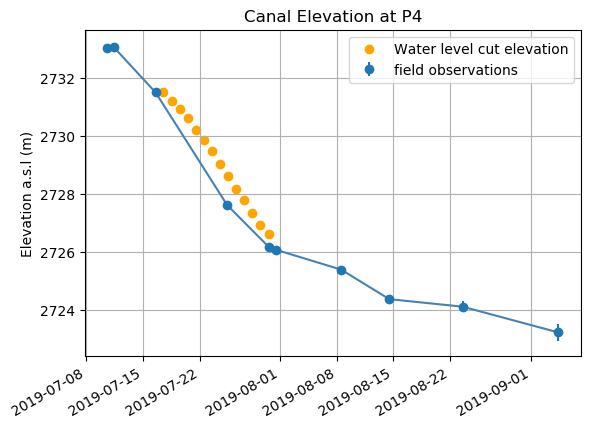

PyObject <matplotlib.legend.Legend object at 0x00000000562DE320>

In [24]:
fig=figure()
p = plot(x4,y4,linestyle="-",color="steelblue")
pe = errorbar(x4,y4,yerr=std_P4,fmt="o", label = "field observations")
scatter(date4,z4,label="Water level cut elevation",color="orange")
fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
grid(true)
ylabel("Elevation a.s.l (m)")
title("Canal Elevation at P4")
legend()

# @ P5

### Field observations

In [25]:
d,head = readdlm(path_data*"Channel_elevation/P5_channel_elevation.csv" , ';', header=true)
x5 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[:,1]]
y5 = d[:,2];
std_P5 = d[:,3];


#x5=[DateTime(2019,7,10,14,57),DateTime(2019,7,11,9,15),DateTime(2019,7,16,14),
   #DateTime(2019,7,25,10,28),DateTime(2019,7,30,14,31),DateTime(2019,7,31,10,26),
    #DateTime(2019,8,8,12,57),DateTime(2019,8,14,11,19),DateTime(2019,8,23,13,50),DateTime(2019,9,4,10,2)];
#y5=[2732.67,2732.54,2731.74,2728.1,2726.24,2726.25,2725.43,2724.36,2724.27,2724.15];

In [75]:
#total channel incision
y5[1]-y5[end]

8.519999999999982

### Daily water level cuts

Same for P4, here we reconstruct 14 days level, further back the cuts were not sharp enough to read them correctly. 



In [76]:
#daily imprint
d,head = readdlm(path_data*"Channel_elevation/P5_levels_elevation.csv" , ';', header=true)
date5 = [DateTime(dd, "yyyy-mm-ddTH:M:S") for dd in d[2:end,1]]
z5 = d[2:end,2];  #to match z4 times series (there is one extra data in z5)
std_dp_P5 = d[2:end,3];

#date=[DateTime(2019,7,16,14):Day(1):DateTime(2019,7,30,14,31)]
#dp=[5.65,5.2,4.85,4.55,4.25,4,3.6,3.2,2.85,2.35,1.9,1.35,0.75,0.4,0]
#z=dp.+2726.24;

### Top water level from pressure datas

In [77]:
#Incision rate from 22/07 at 12: to 24/07
d=read_Keller_DCX22_CTD(path_CTD*"2019-07-24/205309-100mH2O_16_07_2019-16_15_00.csv");
h1=boxcar(d[:press][findfirst(x->x==DateTime(2019,7,22,12), d[:t]):findfirst(x->x==DateTime(2019,7,24), d[:t])],10)
t1=d[:t][findfirst(x->x==DateTime(2019,7,22,12), d[:t]):findfirst(x->x==DateTime(2019,7,24), d[:t])];
#plot(t1,h1)
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")

### Plot P5

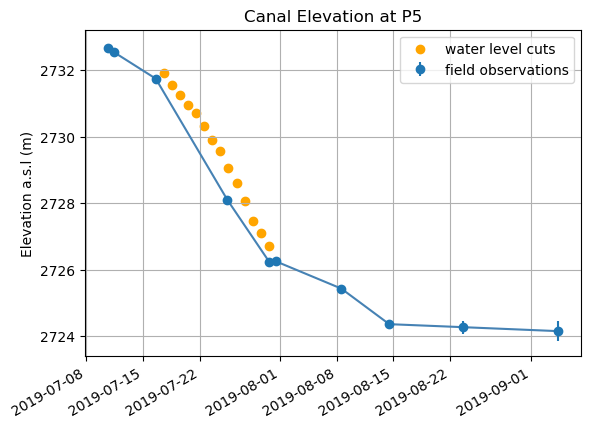

PyObject <matplotlib.legend.Legend object at 0x00000000010727F0>

In [78]:
fig=figure()
p = plot(x5,y5,linestyle="-",color="steelblue")
pe = errorbar(x5,y5,yerr=std_P5,fmt="o", label="field observations")
#pp=plot(t1,h1.+2731.9,label="top water height")
scatter(date5,z5,label="water level cuts",color="orange")
fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
grid(true)
ylabel("Elevation a.s.l (m)")
title("Canal Elevation at P5")
legend()

##### Interpolation of elevation time serie @P5

using function date2decimal in [`helper-functions`](helper-functions.ipynb) to convert DateTime to a float array. And then interpolare the elevation time serie. 

In [79]:
#creation of x5 datetime into decimal
x5_dec = [round(datetime2decimal(x), digits = 3) for x in x5]
#interpolation within the range
y5_interp = LinearInterpolation(x5_dec,y5);

# Channel elevation profil

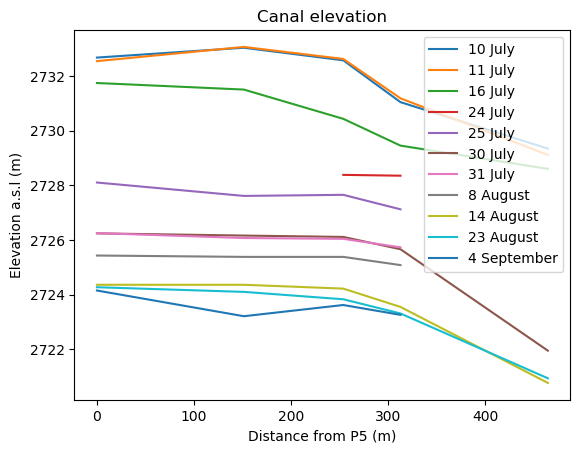

PyObject Text(0.5, 24.0, 'Distance from P5 (m)')

In [80]:
#distance from DEM, origin at P5
d=[464.4,312.6,253.7,151.3,0]

p1=[y1[1],y2[1],y3[2],y4[1],y5[1]]
plot(d,p1,label="10 July")
p2=[y1[2],y2[2],y3[3],y4[2],y5[2]]
plot(d,p2,label="11 July")
p3=[y1[3],y2[3],y3[4],y4[3],y5[3]]
plot(d,p3,label="16 July")
p4=[y2[4],y3[5]]
plot(d[2:3],p4,label="24 July")
p5=[y2[5],y3[6],y4[4],y5[4]]
plot(d[2:5],p5,label="25 July")
p6=[y1[4],y2[6],y3[7],y4[5],y5[5]]
plot(d,p6,label="30 July")
p7=[y2[7],y3[8],y4[6],y5[6]]
plot(d[2:5],p7,label="31 July")
p8=[y2[8],y3[9],y4[7],y5[7]]
plot(d[2:5],p8,label="8 August")
p9=[y1[5],y2[9],y3[10],y4[8],y5[8]]
plot(d,p9,label="14 August")
p10=[y1[6],y2[10],y3[11],y4[9],y5[9]]
plot(d,p10,label="23 August")
p11=[y2[11],y3[12],y4[10],y5[10]]
plot(d[2:5],p11,label="4 September")
legend()
title("Canal elevation")
ylabel("Elevation a.s.l (m)")
xlabel("Distance from P5 (m)")

# Figure 3 - Channel bottom elevation channel-along profile

In [40]:
#distance from DEM, origin at P5
d=[464.4,312.6,253.7,151.3,0];

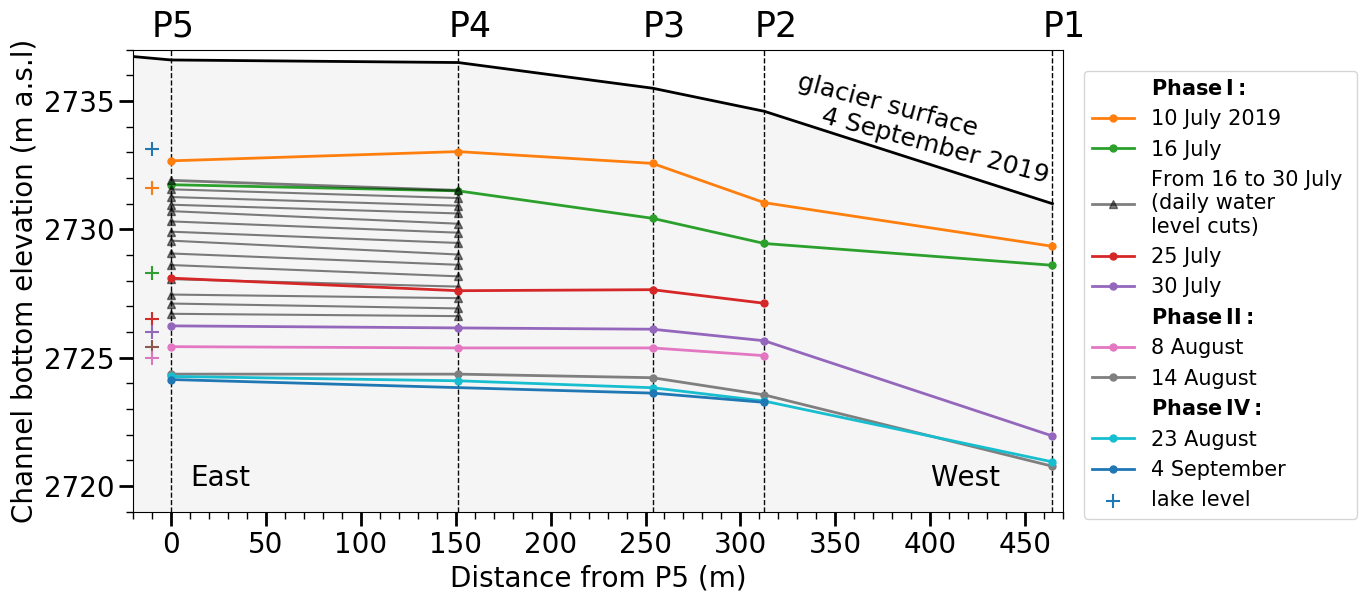

In [41]:
fig= figure(figsize=(12,6))
pygui(false)
ax=gca()

cs = 100 #cross marker size

#A trick to plot Phases I
plot(0,0,label=L"\mathbf{Phase\,I:}",alpha=0)


p1=[y1[1],y2[1],y3[2],y4[1],y5[1]]
plot(d,p1,label="10 July 2019",marker = "o", markersize = 5, linewidth=2)
scatter(-10,2733.15,marker = "+", s=cs, label="lake level")
p3=[y1[3],y2[3],y3[4],y4[3],y5[3]]
plot(d,p3,label="16 July",marker = "o", markersize = 5, linewidth=2)
scatter(-10,2731.6,marker = "+", s=cs)
#from 16th July daily imprint
#dp5=[5.2,4.85,4.55,4.25,4,3.6,3.2,2.85,2.35,1.9,1.35,0.75,0.4,0].+2726.24
#dp4=[0,0.3,0.7,1.15,1.55,2,2.4,2.85,3.25,3.6,4,4.3,4.6,4.9]
#dp4=reverse(dp4) .+ 2726.1
for i in 1:14
    if i == 1 #test to make only one label appear
        plot([d[5],d[4]] , [z5[i],z4[i]],marker = "^", markersize = 6, linewidth=2
            , color = "black", alpha=0.5, label="From 16 to 30 July 
(daily water 
level cuts)")
    else
        plot([d[5],d[4]] , [z5[i],z4[i]],marker = "^", markersize = 6, color = "black", alpha=0.5)
    end
end
p5=[y2[5],y3[6],y4[4],y5[4]]
plot(d[2:5],p5,label="25 July",marker = "o", markersize = 5, linewidth=2)
scatter(-10,2728.3,marker = "+", s=cs)
p6=[y1[4],y2[6],y3[7],y4[5],y5[5]]
plot(d,p6,label="30 July",marker = "o",markersize = 5, linewidth=2)
scatter(-10,2726.5,marker = "+", s=cs)

#A trick to plot Phases II
plot(0,0,label=L"\mathbf{Phase\,II:}",alpha=0)

p8=[y2[8],y3[9],y4[7],y5[7]]
plot(d[2:5],p8,label="8 August",marker = "o", markersize = 5, linewidth=2)
p9=[y1[5],y2[9],y3[10],y4[8],y5[8]]
scatter(-10,2726,marker = "+", s=cs)
plot(d,p9,label="14 August",marker = "o", markersize = 5, linewidth=2)
p10=[y1[6],y2[10],y3[11],y4[9],y5[9]]
scatter(-10,2725.4,marker = "+", s=cs)

#A trick to plot Phases IV
plot(0,0,label=L"\mathbf{Phase\,IV:}",alpha=0)

plot(d,p10,label="23 August",marker = "o", markersize = 5, linewidth=2)
scatter(-10,2725,marker = "+", s=cs)
p11=[y2[11],y3[12],y5[10]]
plot([312.6,253.7,0],p11,label="4 September",marker = "o", markersize = 5, linewidth=2)

#19 August 2020:
#plot(d,[2719.6,2722.7,2723,2723.1,2723], label="19 August 2020",marker = "o" , markersize = 5, linewidth=2, color = "black")


#glacier surface at bridge (60 east from P5) ,P5,P4,P3,P2,P1, corner schaft (exactly 11m west from P1)
dx=[464.4,312.6,253.7,151.3,0,-60]
#10th july:
gl_surf_10 = [2735,2733,2735,2739,2742.5,2742.4,2742.6]
#4th September
gl_surf_4 = [2731,2734.6,2735.5,2736.5,2736.6,2737]
#plot(dx,gl_surf_10, linestyle = "--", color = "black", label = "glacier surface 10th July")
plot(dx,gl_surf_4, linestyle = "-", color = "black", linewidth=2)
stackplot(dx, gl_surf_4, color="grey",alpha=0.08)


#P5
#ax.vlines(x=d[5],  ymin=gl_surf_4[5],ymax=2737, linestyle="dotted", linewidth=2,color="black")
axvline(x=d[5], linestyle="dashed", linewidth=1,color="black",zorder=-1)
text(-10,2737.5,"P5", fontsize = 25)
#P4
#ax.vlines(x=d[4], ymin=gl_surf_4[4],ymax=2737 ,linestyle="dotted", linewidth=2,color="black")
axvline(x=d[4], linestyle="dashed", linewidth=1,color="black",zorder=-1)
text(d[4]-5,2737.5,"P4", fontsize = 25)
#P3
#ax.vlines(x=d[3], ymin=gl_surf_4[3],ymax=2737 ,linestyle="dotted", linewidth=2,color="black")
axvline(x=d[3], linestyle="dashed", linewidth=1,color="black",zorder=-1)
text(d[3]-5,2737.5,"P3", fontsize = 25)
#P2
#ax.vlines(x=d[2], ymin=gl_surf_4[2],ymax=2737 ,linestyle="dotted", linewidth=2,color="black")
axvline(x=d[2], linestyle="dashed", linewidth=1,color="black",zorder=-1)
text(d[2]-5,2737.5,"P2", fontsize = 25)
#P1
#ax.vlines(x=d[1], ymin=gl_surf_4[1],ymax=2737 ,linestyle="dotted", linewidth=2,color="black")
axvline(x=d[1], linestyle="dashed", linewidth=1,color="black",zorder=-1)
text(d[1]-5,2737.5,"P1", fontsize = 25)

text(325,2731.8,"glacier surface 
    4 September 2019",rotation=-15, fontsize = 18)

#Arrow  East

#arrow(10, 2721, 30, 0, width=0.3, head_width=1, head_length=10)
text(10,2720,"East", fontsize=20)
text(400,2720,"West", fontsize=20)

#Major and minor ticks

plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

Mx = matplotlib.ticker.MultipleLocator(50) # Define interval of major ticks
#f = matplotlib[:ticker][:FormatStrFormatter]("%1.2f") # Define format of tick labels
ax.xaxis.set_major_locator.(Mx) # Set interval of major ticks
#ax[:xaxis][:set_major_formatter](f) # Set format of tick labels
mx = matplotlib.ticker.MultipleLocator(10) # Define interval of minor ticks
ax.xaxis.set_minor_locator(mx) # Set interval of minor ticks
ax.xaxis.set_tick_params(which="major",length=10,width=2)
ax.xaxis.set_tick_params(which="minor",length=5,width=1)

My = matplotlib.ticker.MultipleLocator(5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
my = matplotlib.ticker.MultipleLocator(1) # Define interval of minor ticks
ax.yaxis.set_minor_locator(my) # Set interval of minor ticks
ax.yaxis.set_tick_params(which="major",length=10,width=2)
ax.yaxis.set_tick_params(which="minor",length=5,width=1)


xlim(-20,470)
ylim(2719,2737)
xlabel("Distance from P5 (m)", fontsize=20)
ylabel("Channel bottom elevation (m a.s.l)", fontsize=20)
legend(bbox_to_anchor=[1,1],loc=2,borderaxespad=1, fontsize=15)
#text(630,2732,"Ph. I",rotation=-90, zorder=1,fontsize=15)
#text(630,2727,"Ph. II",rotation=-90, zorder=1,fontsize=15)
#text(630,2725,"Ph. III",rotation=-90, zorder=1,fontsize=15)

savefig(path_plots*"channel_elevation _profil.pdf",bbox_inches="tight")
#savefig(path_plots*"channel_elevation _profil.png",bbox_inches="tight") 

# Width measurements

In [81]:
#time when w=1m was acutally just at the construction time (may/june), such that the 9 july it is already wider.
## IMPORTANT: I think we cannot say 1m wide the 9 july, this is not a field observation, but a deduction
wide_p3 = [1, 1.6, 2.3 ]
t_p3 = [DateTime(2019,7,9,14,35), DateTime(2019,7,16,13,17), DateTime(2019,7,25,9,48)    ]

wide_p5 = [1, 2.69, 2.97, 3.15, 0.55 ]
t_p5 = [DateTime(2019,7,9,14,35), DateTime(2019,7,25,10,28), DateTime(2019,7,31,10,26), DateTime(2019,8,8,12,57), DateTime(2019,9,4,10,2)];

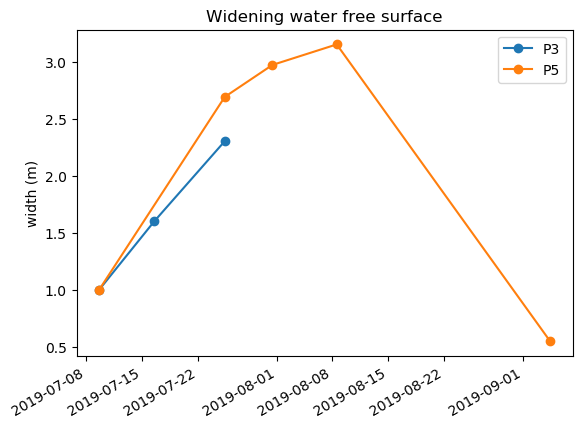

PyObject <matplotlib.legend.Legend object at 0x000000000119F198>

In [82]:
fig = figure()
plot(t_p3,wide_p3, marker="o", label="P3")
plot(t_p5,wide_p5, marker="o", label="P5")
fig.autofmt_xdate(bottom=0.2,rotation=30,ha="right")
title("Widening water free surface")
ylabel("width (m)")
legend()